In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
data = pd.read_csv('/train.csv')

In [26]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./784)
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./10)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    return W1, b1, W2, b2

def ReLU(z):
    return np.maximum(z, 0)

def softmax(Z):
    Z -= np.max(Z, axis=0)
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration:", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

iterations = 500
alpha = 0.10
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, iterations, alpha)


Iteration: 0
[1 1 4 ... 4 4 4] [2 3 1 ... 4 3 4]
0.07212195121951219
Iteration: 10
[0 8 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.427
Iteration: 20
[0 8 8 ... 4 3 4] [2 3 1 ... 4 3 4]
0.5407317073170732
Iteration: 30
[0 8 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.6441707317073171
Iteration: 40
[0 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.7046341463414634
Iteration: 50
[2 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.7394878048780488
Iteration: 60
[2 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.7628780487804878
Iteration: 70
[2 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.7807804878048781
Iteration: 80
[2 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.7959024390243903
Iteration: 90
[2 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.8076585365853659
Iteration: 100
[2 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.8176829268292682
Iteration: 110
[2 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.8254146341463414
Iteration: 120
[2 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.8320243902439024
Iteration: 130
[2 3 1 ... 4 3 4] [2 3 1 ... 4 3 4]
0.8379268292682926
Iteration: 140
[2 3 1 ... 4 3 4] [2 3 1 ...

In [50]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


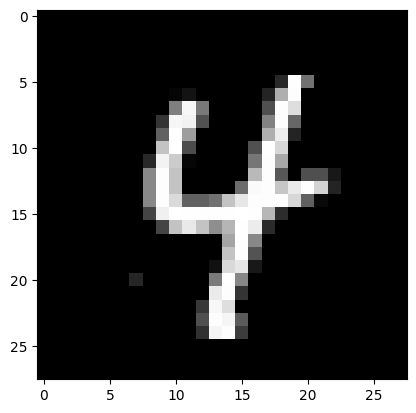

In [52]:
test_predictions(10, W1, b1, W2, b2)

In [54]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 3 2 1 6 6 6 5 0 0 5 1 1 8 0 0 4 6 0 3 9 8 9 0 7 4 0 1 7 3 9 4 0 7 1 2 0
 6 9 5 4 7 1 6 2 0 1 3 3 0 2 3 3 2 2 2 7 6 9 6 5 7 6 8 8 3 3 0 5 9 0 4 3 5
 3 1 4 5 8 2 1 0 9 7 0 1 3 9 0 5 5 2 1 6 7 8 1 2 4 8 0 7 6 9 0 7 7 3 1 0 1
 7 8 2 9 3 2 0 2 5 8 8 4 0 9 7 3 8 5 4 5 4 8 6 7 7 6 2 0 9 3 8 4 9 4 1 5 0
 9 2 9 2 8 2 9 0 2 9 2 3 8 6 0 1 1 3 9 9 2 1 5 1 3 1 8 9 2 4 0 3 2 9 9 3 3
 2 9 7 9 3 7 7 7 2 6 5 4 9 4 6 8 0 1 9 0 7 0 7 1 1 4 7 2 3 0 2 7 7 9 4 5 1
 7 7 1 7 4 7 9 5 4 3 2 0 0 7 4 1 6 4 8 5 1 9 8 0 2 6 8 2 9 0 0 8 1 3 0 5 6
 5 6 1 4 2 2 0 2 6 0 4 9 7 4 8 6 8 6 1 8 5 0 2 9 6 6 3 2 9 8 1 3 7 9 5 0 2
 2 1 0 5 6 6 5 0 4 7 3 8 9 7 9 5 6 5 4 7 8 7 7 2 8 0 8 4 5 0 1 4 2 1 7 0 7
 4 7 3 2 9 6 7 7 5 3 6 3 3 2 7 7 6 7 9 2 6 6 2 9 7 6 4 1 4 0 6 6 1 8 0 6 9
 0 6 4 7 1 9 2 4 9 2 4 3 2 6 1 3 1 0 2 7 8 9 9 3 8 4 7 1 5 7 0 5 2 8 8 1 9
 2 6 7 6 8 6 5 1 7 3 8 1 5 4 1 8 2 8 0 7 9 5 6 7 2 2 9 7 4 7 9 3 5 6 2 5 1
 4 1 1 8 9 9 5 4 1 9 1 8 5 2 2 8 4 3 7 5 6 5 7 6 9 6 7 7 1 8 8 4 2 6 9 1 3
 6 5 5 9 3 1 3 9 2 1 4 7 

0.889